<a href="https://colab.research.google.com/github/hariharannatesh/Dimension-Estimation-from-Depth-Map-of-Monocular-Image/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a = []
while(1):
  a.append('1')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras import Input
from google.colab.patches import cv2_imshow
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.models import Model

2079
(424, 512)
(2079, 424, 512, 1)


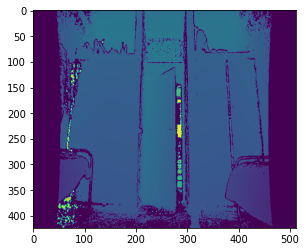

In [ ]:
#X=np.load('/content/gdrive/My Drive/Dataset/Autoencoder_arrays/images_depth_autoenco1.npy')
X=np.load('/content/gdrive/My Drive/Dataset/Autoencoder_arrays/Final Array after concatenation/images_depth_autoencoder.npy')
print(len(X))
print(X[0].shape)
plt.imshow(X[0])
X=np.reshape(X,(len(X),424,512,1))
X=X/255.0
print(X.shape)

In [ ]:
shuffle(X,random_state=100)
X_new=X[0:int(len(X)/2)]
X_rest=X[int(len(X)/2):len(X)]
print(len(X_new),len(X_rest))

1039 1040


In [ ]:
X_train,X_test=train_test_split(X_new,test_size=0.2,random_state=50)
print(len(X_train))

831


In [ ]:
input_img=Input(shape=(424,512,1))
nn=Conv2D(16,(7,7),activation='relu',padding='same')(input_img)
nn=MaxPool2D(pool_size=(4,4),strides=(4,4),padding='same')(nn)
nn=Conv2D(32,(5,5),activation='relu',padding='same')(nn)
encoded=MaxPool2D(pool_size=(2,4),strides=(2,4),name="bottleneck",padding='same')(nn)

dnn=Conv2D(32,(5,5),activation='relu',padding='same')(encoded)
dnn=UpSampling2D((2,4))(dnn)
dnn=Conv2D(16,(7,7),activation='relu',padding='same')(dnn)
dnn=UpSampling2D((4,4))(dnn)
decoded=Conv2D(1,(3,3),activation='sigmoid',padding='same')(dnn)


In [ ]:
autoencoder=Model(input_img,decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 424, 512, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 424, 512, 16)      800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 106, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 128, 32)      12832     
_________________________________________________________________
bottleneck (MaxPooling2D)    (None, 53, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 32, 32)        25632     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 106, 128, 32)      0     

In [ ]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
history=autoencoder.fit(X_train,X_train,shuffle=1,validation_split=0.2,initial_epoch=0,epochs=10)

Epoch 1/10
21/21 [==============================] - 278s 13s/step - loss: 0.6857 - val_loss: 0.6852
Epoch 2/10
21/21 [==============================] - 278s 13s/step - loss: 0.6845 - val_loss: 0.6840
Epoch 3/10
21/21 [==============================] - 277s 13s/step - loss: 0.6833 - val_loss: 0.6828
Epoch 4/10
21/21 [==============================] - 277s 13s/step - loss: 0.6821 - val_loss: 0.6815
Epoch 5/10
21/21 [==============================] - 278s 13s/step - loss: 0.6809 - val_loss: 0.6803
Epoch 6/10
21/21 [==============================] - 278s 13s/step - loss: 0.6796 - val_loss: 0.6790
Epoch 7/10
21/21 [==============================] - 278s 13s/step - loss: 0.6783 - val_loss: 0.6777
Epoch 8/10
21/21 [==============================] - 279s 13s/step - loss: 0.6770 - val_loss: 0.6763
Epoch 9/10
21/21 [==============================] - 279s 13s/step - loss: 0.6756 - val_loss: 0.6749
Epoch 10/10
21/21 [==============================] - 278s 13s/step - loss: 0.6742 - val_loss: 0.6735

(1, 424, 512, 1)


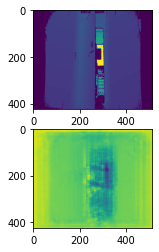

In [ ]:
decoded_img=autoencoder.predict(X_test[100].reshape(1,424,512,1))
print(decoded_img.shape)
testx=X_test[100].reshape(424,512)
fig,axs=plt.subplots(2)
axs[0].imshow(testx)
axs[1].imshow(decoded_img.reshape(424,512))

In [ ]:
encoder=Model(input_img,autoencoder.get_layer(name="bottleneck").output)
encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 424, 512, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 424, 512, 16)      800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 106, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 128, 32)      12832     
_________________________________________________________________
bottleneck (MaxPooling2D)    (None, 53, 32, 32)        0         
Total params: 13,632
Trainable params: 13,632
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder.save('/content/gdrive/My Drive/save_model/conv_encoder.h5')

In [ ]:
encoded_imgs=encoder.predict(X_test)
print(encoded_imgs.shape)

(208, 53, 32, 32)


In [ ]:
encoded_flatten=encoded_imgs.reshape(208,53*32*32)
print(encoded_flatten.shape)

(208, 54272)
